In [281]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import matplotlib.pyplot as plt

In [282]:
df = pd.read_excel('data_6.xlsx')
df.columns = ['day','Y','X']
df.sort_values(by=['X'], inplace = True)
df.head()

,day,Y,X
9,10,29.3,26.0
0,1,28.3,26.1
3,4,30.5,26.2
2,3,28.5,26.3
29,30,29.5,26.4


In [283]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['X'], df['Y'])
scipy.stats.linregress(df['X'], df['Y'])

# slope - наклонный
# intercept - Пересечение линии регрессии. 
# r_value - Коэффициент корреляции.
# p_value -Двустороннее p-значение для проверки гипотезы, нулевая гипотеза которой заключается в том, что наклон равен нулю, с использованием критерия Вальда с t-распределением статистики критерия.
# std_err - Стандартная ошибка расчетного градиента.

LinregressResult(slope=1.054004589068256, intercept=1.150025588969978, rvalue=0.8986713878947973, pvalue=1.570516795812702e-11, stderr=0.09721953093439341)

In [284]:
# кореляция способ 1
scipy.stats.pearsonr(df['X'], df['Y'])

(0.8986713878947972, 1.5705167958127257e-11)

In [285]:
# кореляция способ 2
np.corrcoef(df['X'], df['Y'])[0, 1]

0.8986713878947973

In [286]:
# кореляция способ 2
np.corrcoef(df['Y'], df['X'])[0, 1]

0.8986713878947973

In [287]:
df.head()

,day,Y,X
9,10,29.3,26.0
0,1,28.3,26.1
3,4,30.5,26.2
2,3,28.5,26.3
29,30,29.5,26.4


slope: 1.054005    intercept: 1.150026
R-squared: 0.807610


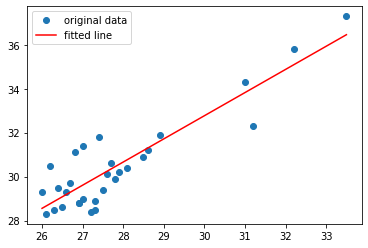

In [288]:
from scipy import stats

np.random.seed(12345678)
x = np.array(df['X'].to_list())
y = np.array(df['Y'].to_list())

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

slope: 0.766230    intercept: 4.474305
R-squared: 0.807610


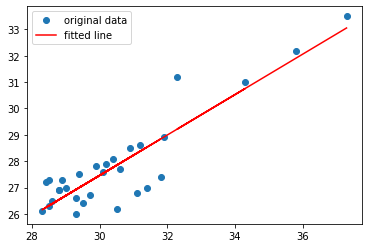

In [276]:
# тоже самое но для Y(X)

x2 = np.array(df['Y'].to_list())
y2 = np.array(df['X'].to_list())

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)
print("slope: %f    intercept: %f" % (slope2, intercept2))
print("R-squared: %f" % r_value2**2)

plt.plot(x2, y2, 'o', label='original data')
plt.plot(x2, intercept2 + slope2*x2, 'r', label='fitted line')
plt.legend()
plt.show()

In [263]:
# тест фишера попытка
m = 1
n = df.shape[0]
F_imper = r_value**2/(1-r_value**2)*(n-m-1)/m

# print('F_imper=', round(F_imper,3),'\nF_crit=', round(F_crit,3))
print('F_imper=', round(F_imper,3))

F_imper= 117.538


In [264]:
m = 1
n = df.shape[0]

alpha = 0.95
f1 = m
f2 = n - m - 1
print('f1 =',f1,',','f2 =',f2)

# F_crit1 = scipy.stats.f.sf(alpha, f1, f2)
# F_crit2 = scipy.stats.f.pdf(alpha, f1, f2)
# F_crit3 = scipy.stats.f.cdf(alpha, f1, f2)
F_crit3 = scipy.stats.f.ppf(alpha, f1, f2)


print(F_crit1,F_crit2,F_crit3)

f1 = 1 , f2 = 28
0.33806526241332535 0.2500683188662149 4.195971818557765


In [265]:
scipy.stats.chi2

alpha = 0.95
f = 10
# retrieve value <= probability

value = chi2.ppf(alpha, f)
print(value)
# confirm with cdf
p = chi2.cdf(value, df)
print(p)

NameError: name 'chi2' is not defined

In [302]:
# оценка коэфицентво a и b
a = intercept
b = slope
n = df.shape[0]
print('a =',round(a,3),'b =',round(b,3),'n =',n)

# теор расчет
x_mid = 1/n*df['X'].sum()
y_mid = 1/n*df['Y'].sum()
print('x_mid =', round(x_mid) ,'y_mid =',round(y_mid,3) )

S2 = 1/(n-2)*((df['Y']-a-b*df['X'])**2).sum()
S = np.sqrt(S2)
Sx = 1/(n-1)*((df['X']-x_mid)**2).sum()
S_beta = S/(Sx*np.sqrt(n-1))
S_alpha = S*np.sqrt(1/n + x_mid**2/((n-1)*Sx**2))
print('S2 =', round(S2,3) ,'S =',round(S,3) ,'Sx =',round(Sx,3) ,'S_beta =',round(S_beta,3) ,'S_alpha =',round(S_alpha,3) )



# теор расчет квантиля т распределения 
alpha_prived = (0.95+1)/2
f = n - 2
t_qvatil = round(scipy.stats.t.ppf(alpha_prived, f),3)
print('t_qvatil =', round(t_qvatil,3))

# сравним
print(round(b,3), '>', round(t_qvatil*S_beta,3), 'то коэфицент b значимый')
print(round(a,3), '>', round(t_qvatil*S_alpha,3), 'то коэфицент a значимый')
print('Двухсторонний доверительный интервал', round(b-t_qvatil*S_beta,3), '<= Betta <=', round(b+t_qvatil*S_beta,3))
print('Двухсторонний доверительный интервал', round(a-t_qvatil*S_alpha,3), '<= Alpha <=', round(a+t_qvatil*S_alpha,3))


a = 1.15 b = 1.054 n = 30
x_mid = 28.0 y_mid = 30.49
S2 = 0.93 S = 0.964 Sx = 3.391 S_beta = 0.053 S_alpha = 1.48
t_qvatil = 2.048
1.054 > 0.108 то коэфицент b значимый
1.15 > 3.031 то коэфицент a значимый
Двухсторонний доверительный интервал 0.946 <= Betta <= 1.162
Двухсторонний доверительный интервал -1.881 <= Alpha <= 4.181


0.964139703358748

In [267]:
Sb = S/(Sx*np.sqrt(29))
print(Sb)
S_beta = S/(Sx*np.sqrt(n-1))

Sx = 1/(n-1)*((df['X']-x_mid)**2).sum()
print(Sx)

3.80206023798525e-09
3.3913678160919543
